# Problema 9


Se desean medir los colores (U, B, V) de una estrella desconocida. 

Se dispone de un fotómetro cuya medida por unidad de tiempo es proporcional al flujo recibido. 

Se mide en la estrella estándar Vega durante 1 minuto a diferentes distancias cenitales z, obteniéndose las siguientes cuentas para los diferentes filtros:


|  z         | V   |  B   |  U   |
|------------|-----|------|------|
|   20º      | 1e4 | 8e3  | 5e3  |
|   40º      |9460 |7247  | 4223 |
|   60º      |8063 |5451  | 2597 |

Posteriormente se miden los flujos para la estrella desconocida, que es mucho más débil que
Vega, midiéndose en cada filtro durante 10 minutos. Se obtienen los siguientes registros:

|  z         | V   |  B   |  U   |
|------------|-----|------|------|
|  40º       |3784 | 2998 | 1689 |


Determinar los valores de $m_V$, $m_B$ y $m_U$.


## Planteamiento

Esto es una versión algo más realista del problema anterior. Tenemos un sistema que recoge luz y que nos devuelve un valor numérico proporcional a la energía recogida durante el tiempo de exposición. Sin embargo, no sabemos ni la constante de proporcionalidad ni el valor de la extinción atmosférica. 

Además, recordemos que la magnitud se calcula a partir de la **irradiancia**, por lo que necesitamos valores de energía por unidad de área y unidad de tiempo. Dado que la medida numérica, *cuentas*, de nuestro instrumento es proporcional a la energía, tenemos que dividir entre el tiempo en el que se ha estado recogiendo luz: **el tiempo de exposición**.

Para poder obtener una medidad correcta de la magnitud, es neceseario calibrar el instrumento observando estrellas de magnitud conocida. Con estas estrellas de referencia, es posible calcular tanto la extinción atmosférica como el término de calibración instrumental.

Aunque en general se utilizan varias estrellas estándar, en este problema vamos a ver un ejemplo simplificado con una sola.

Supongamos que se observa una estrella de magnitud conocida $m_0$ a diferentes masas de aire $z_i$. Las medidas de **cuentas por unidad de tiempo** en cada observación son $E_i$.

Por un lado, el efecto de la extinción atmosférica será aumentar la magnitud para obtener un valor observado $m_i$:

$$m_i = m_0 + k \sec z_i$$

Por otro lado, se puede obtener la magnitud observada a partir de las medidas del instrumento como:

$$m_i = C - 2.5 \log E_i$$

Tanto el valor de la constante instrumental $C$ como la extinción atmosférica $k$ dependen de la banda de observación.

Igualando queda:
$$m_0 + k \sec z_i =  C - 2.5 \log E_i$$

y reordenando:
$$m_0 + 2.5 \log E_i = C - k \sec z_i$$

Dado que tenemos $i$ medidas, podemos obtener los valores $C$ y $k$ a partir de un ajuste por mínimos cuadrados de los valores $(\sec z_i, m_0 + 2.5 \log E_i)$. Este método se conoce como el de la recta de Bouguer.

Una vez que hemos calculado $C$ y $k$, con el sistema calibrado, podemos aplicar las dos primeras ecuaciones a la estrella problema para calcular su magnitud fuera de la atmósfera.

In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.coordinates import Angle

#### Estrella estándar.

Utilizamos Vega como referencia y sabemos que todas sus magnitudes son cero. 

En un caso real, Vega sería demasiado brillante como para utilizarse como estándar y además es ligeramente variable (entorno al 1% de variacion de brillo).

Recolectamos aquí los valores medidos para Vega. Hay que calcular la constante instrumental y la extinción paraca da banda. Se han realizado medidas a tres alturas diferentes,


In [2]:
# magnitudes de vega
mV_vega = 0
mB_vega = 0
mU_vega = 0
# Medidas de Vega
z_vega = Angle([20, 40, 60], unit=u.deg) # Una lista de distancias cenitales
masa_aire_vega = 1 / np.cos(z_vega) # Lista de masas de aire
cuentas_vega_V = np.array([1e4, 9460, 8063])
cuentas_vega_B = np.array([8e3, 7247, 5451])
cuentas_vega_U = np.array([5e3, 4223, 2597])
tiempo_vega = 1 * 60 # 60 segundos


In [3]:
## Las medidas de energía recibida por unidad de tiempo
cuentas_vega_V_t = cuentas_vega_V / tiempo_vega
cuentas_vega_B_t = cuentas_vega_B / tiempo_vega
cuentas_vega_U_t = cuentas_vega_U / tiempo_vega

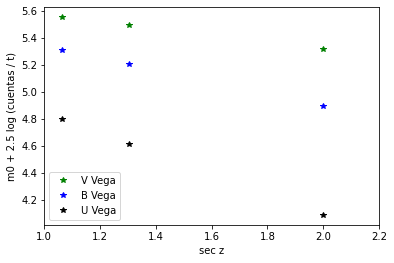

In [4]:
# Medidas de Vega en función de la masa de aire sec z
plt.plot(masa_aire_vega, mV_vega + 2.5* np.log10(cuentas_vega_V_t), '*', c='g', label='V Vega')
plt.plot(masa_aire_vega, mB_vega + 2.5* np.log10(cuentas_vega_B_t), '*', c='b', label='B Vega')
plt.plot(masa_aire_vega, mU_vega + 2.5* np.log10(cuentas_vega_U_t), '*', c='k', label='U Vega')
plt.legend()
plt.xlim([1, 2.2])
plt.xlabel("sec z")
plt.ylabel("m0 + 2.5 log (cuentas / t)");

In [5]:
# Ajuste por mínimos cuadrados
# Queremos la pendiente p cambiada de signo

p, CV = np.polyfit(masa_aire_vega, mV_vega + 2.5* np.log10(cuentas_vega_V_t), deg=1)
kV = -p
p, CB = np.polyfit(masa_aire_vega, mB_vega + 2.5* np.log10(cuentas_vega_B_t), deg=1)
kB = -p
p, CU = np.polyfit(masa_aire_vega, mU_vega + 2.5* np.log10(cuentas_vega_U_t), deg=1)
kU = -p

print(f'Extinción V: {kV:.2f} magnitudes, constante instrumental V {CV:.2f}')
print(f'Extinción B: {kB:.2f} magnitudes, constante instrumental B {CB:.2f}')
print(f'Extinción U: {kU:.2f} magnitudes, constante instrumental U {CU:.2f}')
print('Cada valor obtenido tendrá asociado una incertidumbre. No lo estamos teniendo en cuenta')

Extinción V: 0.25 magnitudes, constante instrumental V 5.82
Extinción B: 0.45 magnitudes, constante instrumental B 5.79
Extinción U: 0.76 magnitudes, constante instrumental U 5.61
Cada valor obtenido tendrá asociado una incertidumbre. No lo estamos teniendo en cuenta


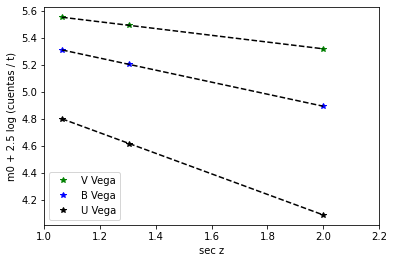

In [6]:
# Representamos los ajustes.
# En un caso real no son tan buenos

plt.plot(masa_aire_vega, mV_vega + 2.5* np.log10(cuentas_vega_V_t), '*', c='g', label='V Vega')
plt.plot(masa_aire_vega, mB_vega + 2.5* np.log10(cuentas_vega_B_t), '*', c='b', label='B Vega')
plt.plot(masa_aire_vega, mU_vega + 2.5* np.log10(cuentas_vega_U_t), '*', c='k', label='U Vega')
plt.legend()
# Ajustes
plt.plot(masa_aire_vega, CV - kV * masa_aire_vega, c='k', ls='--')
plt.plot(masa_aire_vega, CB - kB * masa_aire_vega, c='k', ls='--')
plt.plot(masa_aire_vega, CU - kU * masa_aire_vega, c='k', ls='--')

plt.xlim([1, 2.2])
plt.xlabel("sec z")
plt.ylabel("m0 + 2.5 log (cuentas / t)");

### Estrella problema

Una vez conocidos los valores de $C$ y $k$, podemos aplicarlos a la estrella problema. 

In [7]:
# Medidas de la estrella desconocida
z = Angle(40, unit=u.deg) # Una lista de ángulos
masa_aire = 1 / np.cos(z) # Lista de masas de aire
cuentas_V = 3784
cuentas_B = 2998
cuentas_U = 1689
tiempo = 10 * 60 # 600 segundos

In [8]:
### Las medidas de energía recibida por unidad de tiempo
cuentas_V_t = cuentas_V / tiempo
cuentas_B_t = cuentas_B / tiempo
cuentas_U_t = cuentas_U / tiempo

In [9]:
# magnitudes observadas, con extinción atmosférica
mV = CV - 2.5 * np.log10(cuentas_V_t)
mB = CB - 2.5 * np.log10(cuentas_B_t)
mU = CU - 2.5 * np.log10(cuentas_U_t)
print(f'Magnitud observada V {mV:.2f}')
print(f'Magnitud observada B {mB:.2f}')
print(f'Magnitud observada U {mU:.2f}')

Magnitud observada V 3.82
Magnitud observada B 4.04
Magnitud observada U 4.49


In [10]:
# Magnitudes aparentes, corregidas de extinción atmosférica
m0V = mV - kV * masa_aire
m0B = mB - kB * masa_aire
m0U = mU - kU * masa_aire
print(f'Magnitud aparente V {m0V:.2f}')
print(f'Magnitud aparente B {m0B:.2f}')
print(f'Magnitud aparente U {m0U:.2f}')

Magnitud aparente V 3.49
Magnitud aparente B 3.46
Magnitud aparente U 3.49
